## Effect of batch size notebook

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from copy import deepcopy
import random
import sys
import time
from typing import List
from pprint import PrettyPrinter
pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
project_dir = globals()['_dh'][0]
sys.path.append(os.path.normpath(os.path.join(
    project_dir, '..', '..', '..', '..')))

from experiments.utils.constants import (
    PIPLINES_PATH,
    NODE_PROFILING_CONFIGS_PATH,
    NODE_PROFILING_RESULTS_STATIC_PATH
)
from experiments.utils.loader import Loader

In [2]:
series = 25
experiment_id = 2
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(
    NODE_PROFILING_RESULTS_STATIC_PATH,
    'series',
    str(series))
loader = Loader(
    series_path=series_path, config_key_mapper=config_key_mapper, second_node=False)
results = loader.result_processing()
key_config_df = loader.key_config_mapper()
# print(results.columns)
# print(key_config_df.columns)
# results
display(key_config_df)

,experiment_id,pipeline_name,node_name,model_variant,cpu_request,memory_request,max_batch_size,max_batch_time,load,load_duration,series,series_meta,replicas
0,1,6-mlserver-mock,mock-one,0,4,8Gi,1,1,1,60,25,testing static trace,1
1,2,6-mlserver-mock,mock-one,0,4,8Gi,1,1,1000,60,25,testing static trace,1
2,3,6-mlserver-mock,mock-one,0,4,8Gi,10,1,1,60,25,testing static trace,1
3,4,6-mlserver-mock,mock-one,0,4,8Gi,10,1,1000,60,25,testing static trace,1
4,5,6-mlserver-mock,mock-one,5,4,8Gi,1,1,1,60,25,testing static trace,1
5,6,6-mlserver-mock,mock-one,5,4,8Gi,1,1,1000,60,25,testing static trace,1
6,7,6-mlserver-mock,mock-one,5,4,8Gi,10,1,1,60,25,testing static trace,1
7,8,6-mlserver-mock,mock-one,5,4,8Gi,10,1,1000,60,25,testing static trace,1


In [8]:
results.keys()

Index(['experiment_id', 'client_to_model_latencies_avg',
       'client_to_model_latencies_p99', 'client_to_model_latencies_p50',
       'client_to_model_latencies_var', 'client_to_model_latencies_max',
       'client_to_model_latencies_min', 'model_latencies_avg',
       'model_latencies_p99', 'model_latencies_p50', 'model_latencies_var',
       'model_latencies_max', 'model_latencies_min',
       'model_to_client_latencies_avg', 'model_to_client_latencies_p99',
       'model_to_client_latencies_p50', 'model_to_client_latencies_var',
       'model_to_client_latencies_max', 'model_to_client_latencies_min',
       'start_time', 'end_time', 'duration', 'timeout_count',
       'cpu_usage_count_avg', 'cpu_usage_count_p99', 'cpu_usage_count_p50',
       'cpu_usage_count_var', 'cpu_usage_count_max', 'cpu_usage_count_min',
       'cpu_usage_rate_avg', 'cpu_usage_rate_p99', 'cpu_usage_rate_p50',
       'cpu_usage_rate_var', 'cpu_usage_rate_max', 'cpu_usage_rate_min',
       'cpu_throttled_coun

In [9]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config) 

File name: 0.yaml
{   'cpu_request': ['4'],
    'data_type': 'audio',
    'max_batch_size': ['1', '10'],
    'max_batch_time': ['1'],
    'memory_request': ['8Gi'],
    'model_variants': ['0', '5'],
    'node_name': 'mock-one',
    'pipeline_name': '6-mlserver-mock',
    'repetition': 1,
    'replicas': [1],
    'series': 25,
    'series_meta': 'testing static trace',
    'timeout': 60,
    'workload_config': {'load_duration': 60, 'loads_to_test': [1, 1000]},
    'workload_type': 'static'}


,model_variant,max_batch_size,cpu_request,load,model_latencies_p99,client_to_model_latencies_avg,model_latencies_avg,model_to_client_latencies_avg
0,0,1,4,1,0.009678,0.150257,0.008564,0.011797
1,0,1,4,1000,0.016340,601.093427,0.008927,5.257692
2,0,10,4,1,0.011611,1.032936,0.009353,0.014286
3,0,10,4,1000,0.065261,601.012129,0.034711,3.312460


Text(0, 0.5, 'Latency (seconds)')

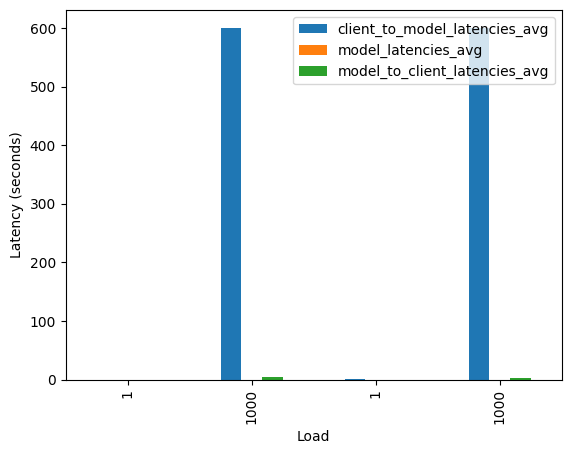

In [3]:
model_variant = 0
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['model_latencies_p99', 'client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='load', y=['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")

,model_variant,max_batch_size,cpu_request,load,model_latencies_p99,client_to_model_latencies_avg,model_latencies_avg,model_to_client_latencies_avg
0,5,1,4,1,5.010881,3.765125,5.010367,0.017172
1,5,1,4,1000,5.014751,781.886415,5.012014,0.097051
2,5,10,4,1,5.014703,5.759437,5.013054,0.030367
3,5,10,4,1000,5.064346,715.251230,5.034864,0.602013


Text(0, 0.5, 'Latency (seconds)')

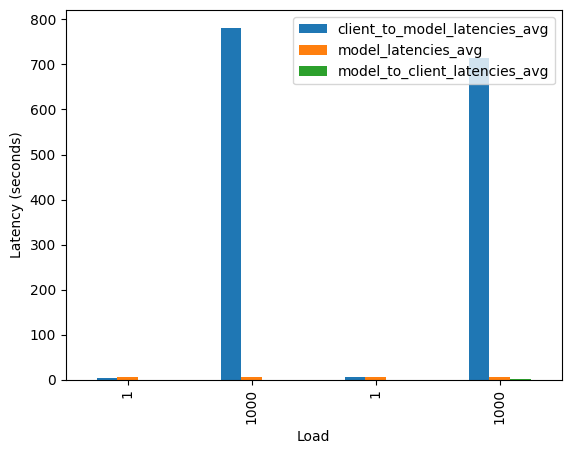

In [4]:
model_variant = 5
experiment_ids = key_config_df[
    key_config_df['model_variant'] == model_variant]['experiment_id'].tolist()
metadata_columns = ['model_variant', 'max_batch_size', 'cpu_request', 'load']
results_columns = ['model_latencies_p99', 'client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg']
output = loader.table_maker(
    experiment_ids=experiment_ids,
    metadata_columns=metadata_columns,
    results_columns=results_columns)
display(output)
ax = output.plot.bar(x='load', y=['client_to_model_latencies_avg', 'model_latencies_avg', 'model_to_client_latencies_avg'])
ax.set_xlabel("Load")
ax.set_ylabel("Latency (seconds)")